# Machine Learning Project Checklist

Resource: Aurélien Géron, *Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow, 2nd Edition*, O'Reilly Media, 2019


The following checklist should be used as a guide for working on the course projects. The content of the checklist is largely based on *Hands-On Machine Learning* from Aurélien Géron. In some places adjustments were made for the course project. The original checklist can be found in Appendix B (page 755) of *Hands-On Machine Learning*.

* **Frame the Problem and Look at the Big Picture:**
    1. Define the objective of your project in your own words.
    2. Select a performance criteria for evaluation of the task.
    3. Explain in a paragraph how you would solve the problem manually.
    4. List assumptions that you made so far.
    
    
* **Get the Data:**
    1. Create a new workspace for the course project. 
    2. Discuss with your colleagues whether you would like to use a version management tool.
        - git: https://git-scm.com/
        - github: https://github.com/
        - github tutorial: https://guides.github.com/activities/hello-world/
    3. Get the data.
    4. Convert the data to a format you can easily manipulate (if required).
    5. Check the size and type of the data.
    6. Sample a test set, put it aside, and never look at it (no data snooping!).
    7. Sample a training set and a validation set.
    
 
* **Explore the Data:**
    1. Create a copy of the training set for exploration (sample it down to a manageable size if necessary).
    2. (Create a Jupyter Notebook for your data exploration.)
    3. Study each attribute and its characteristics
        - name
        - type
        - % of missing values
        - noisiness
        - usefulness for task
        - type of distribution
        - ...
    4. Identify the target attribute (supervised learning).
    5. Visualize the data.
    6. Study correlations between attributes.
    7. Identify the promising transformations you may want to apply.
    8. Document the results of your exploratory data analysis.
    

* **Prepare the Data:**
    1. Write functions for all data transformations you apply.
    2. Clean the data.
        - remove outliers
        - fill in missing values
    3. Select important features (drop attributes that provide no useful information for the task).
    4. Use feature engineering.
        - decompose categorical features
        - add promising transformations for features
        - aggregate features into promissing new features
    5. Use feature scaling (standardize or normalize features).

    
* **Select and Train your Models:**
    1. Learn the basics about the models you've been assigned.
    2. Select a 3rd model on your own. Use criteria for your selection.
    3. Make a plan for training and evaluation of the models.
    4. Build your models (select meaningful values for the model parameters).
    5. Train your models with the training set.
    6. Measure and compare the performance of your models (use N-fold cross-validation).
    7. Analyze the most significant parameters for each model.
    8. Analyze the types of errors the models make.


* **Fine-Tune your Models:**
    1. Fine-tune the hyperparameters using cross-validation.
        - treat your data transformation choices as hyperparameters, especially when you are not sure about them. (e.g. if you are not sure whether to replace missing values with zeros or with the median value, or to just drop the rows.)
        - use grid search and random search $\to$ compare and evaluate the results.
    2. Compare the results of all three models after the fine-tuning process to determine the best hyperparameters.
    3. Select a final model and measure its performance on the test set to estimate the generalization error.
        - dont tweak your model after measuring the generalization error: you would just start overfitting the test set.
    4. Document the results of the examined models. Pay particular attention to the final model.
    
    
*  **Present Your Solution:**
    1. Document what you have done.
        - write a summary of the results in a new, final section
        - explain why your solution achieves the task objective
    2. Create a nice presentation.
        - make sure to highlight the big picture first
        - make sure you explain the assigned model in detail to your fellow students
        - dont forget to present interesting points you noticed along the way
        - list your assumptions and your systems limitations
        - ensure your key findings are communicated


***BEGINNING OF TASK/CHECKLIST-COMPLETION***
<br><br>**I**
* **Frame the Problem and Look at the Big Picture:**
    1. *Define the objective of your project in your own words.*
    <br><br> The objective is to use the data set for the measured temperatures in the electric motor, and by using machine learning methods, specifically a Decision Tree, ANN and another one we can choose freely as a group, create a training model and get an accurate prediction of the permanent magnet temperature. <br><br>
    2. *Select a performance criteria for evaluation of the task.*
    <br><br> RMSE & MAE <br><br>
    3. *Explain in a paragraph how you would solve the problem manually.*
    <br><br> Manually or "by hand" would mean for me that I print out all the data, organized by the profile_id (measurement-ID), and then organized by each column. So for example I would try to have a print out of the table organized by speed, then one organized by stator wing temperature etc. I would try to find similarities. The same I would do with graphs. I would try to get graphs of all temperatures as a result of speed or torque as well as the current and voltage values, in order to see the dependance of the PM temperature of other attributes. I would then try to find a mathematical equation that matches the graph of the PM temperature, which would help me predict the temperature for new values. <br><br>
    4. *List assumptions that you made so far.*
    <br><br> So far I assume that there has to be a similarity or linearity for the temperatures. However, this would be an easy task, which is why I do not believe my assumption is correct. I believe that there is complex mathematics involved, depending on the temperature of the other elements in the motor, as well as the current speed, torque (that also are not linear or "easy" when compared to one another) and the measures current and voltage, resulting in different PM temperatures that have no logical dependance (at first glance). Therefore, an precise prediction of the exact tem>preture (with comma values) is important and it has to be values instead of areas, such as low, medium, hot temperatures or similar. Thus, regression methods are to be used and this is not a classification task.

**II**
* **Get the Data:**
    1. Create a new workspace for the course project. 
    2. Discuss with your colleagues whether you would like to use a version management tool.
        - git: https://git-scm.com/
        - github: https://github.com/
        - github tutorial: https://guides.github.com/activities/hello-world/
    3. Get the data.
    4. Convert the data to a format you can easily manipulate (if required).
    5. Check the size and type of the data.
   <br><br> *This is done with github and the data is already in a csv-file, so no modifications are necessary. Importing and checking the data follows:*

In [3]:
# Importing all required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# This is for rendering plots inline
%matplotlib inline

# This is to enhance visibility and size for graphs that are to follow
plt.rcParams['figure.figsize'] = (15, 5)

# Reading the data from the csv-file and creating a copy called "emc"
e_measures = pd.read_csv('measures_v2.csv')
emc = e_measures.copy()

As indicated below, I can tell that the data set contains 1,330,816 (one point three million) entries and takes up 132 MB of storage. Mostly, they are consisting of the float type and there is only one integer: the profile_id, which is the number of the respective measurement.

In [4]:
emc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330816 entries, 0 to 1330815
Data columns (total 13 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   u_q             1330816 non-null  float64
 1   coolant         1330816 non-null  float64
 2   stator_winding  1330816 non-null  float64
 3   u_d             1330816 non-null  float64
 4   stator_tooth    1330816 non-null  float64
 5   motor_speed     1330816 non-null  float64
 6   i_d             1330816 non-null  float64
 7   i_q             1330816 non-null  float64
 8   pm              1330816 non-null  float64
 9   stator_yoke     1330816 non-null  float64
 10  ambient         1330816 non-null  float64
 11  torque          1330816 non-null  float64
 12  profile_id      1330816 non-null  int64  
dtypes: float64(12), int64(1)
memory usage: 132.0 MB


**II**
* **Get the Data:**
    6. Sample a test set, put it aside, and never look at it (no data snooping!).
    7. Sample a training set and a validation set.

In [5]:
#from sklearn.model_selection import train_test_split
#x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=100)

In [6]:
# Creating the test set, containing of 15% of the data,
# since the usually recommended 20% is too much for this size of 1,3 million entries.
# Using this code allows us to always have the same test dataset instead of getting a newly randomized set each time
# we run the code.
from sklearn.model_selection import train_test_split

rest_set, test_set = train_test_split(emc, test_size=0.2, random_state=11)

print("Lenght of test set: " + str(len(test_set)))
print("Lenght of rest set: " + str(len(rest_set)))

Lenght of test set: 266164
Lenght of rest set: 1064652


In [7]:
# Creating the training and validation set out of the remaining rest set
from sklearn.model_selection import train_test_split

train_set, val_set = train_test_split(rest_set, test_size=0.1, random_state=22)

print("Lenght of train set: " + str(len(train_set)))
print("Lenght of val set: " + str(len(val_set)))

Lenght of train set: 958186
Lenght of val set: 106466


**III**
* **Explore the Data:**
    1. Create a copy of the training set for exploration (sample it down to a manageable size if necessary).
    2. (Create a Jupyter Notebook for your data exploration.)

In [8]:
emct = train_set.copy()
emct.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 958186 entries, 136699 to 1289929
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   u_q             958186 non-null  float64
 1   coolant         958186 non-null  float64
 2   stator_winding  958186 non-null  float64
 3   u_d             958186 non-null  float64
 4   stator_tooth    958186 non-null  float64
 5   motor_speed     958186 non-null  float64
 6   i_d             958186 non-null  float64
 7   i_q             958186 non-null  float64
 8   pm              958186 non-null  float64
 9   stator_yoke     958186 non-null  float64
 10  ambient         958186 non-null  float64
 11  torque          958186 non-null  float64
 12  profile_id      958186 non-null  int64  
dtypes: float64(12), int64(1)
memory usage: 102.3 MB


**III**
* **Explore the Data:**
    3. Study each attribute and its characteristics
        - name
        - type
        - % of missing values
        - noisiness
        - usefulness for task
        - type of distribution
        - ...
    4. Identify the target attribute (supervised learning).
    5. Visualize the data.
    6. Study correlations between attributes.
    7. Identify the promising transformations you may want to apply.
    8. Document the results of your exploratory data analysis.

In [9]:
emc.describe()

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque,profile_id
count,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06
mean,5.427900e+01,3.622999e+01,6.634275e+01,-2.513381e+01,5.687858e+01,2.202081e+03,-6.871681e+01,3.741278e+01,5.850678e+01,4.818796e+01,2.456526e+01,3.110603e+01,4.079306e+01
std,4.417323e+01,2.178615e+01,2.867206e+01,6.309197e+01,2.295223e+01,1.859663e+03,6.493323e+01,9.218188e+01,1.900150e+01,1.999100e+01,1.929522e+00,7.713575e+01,2.504549e+01
min,-2.529093e+01,1.062375e+01,1.858582e+01,-1.315304e+02,1.813398e+01,-2.755491e+02,-2.780036e+02,-2.934268e+02,2.085696e+01,1.807669e+01,8.783478e+00,-2.464667e+02,2.000000e+00
25%,1.206992e+01,1.869814e+01,4.278796e+01,-7.869090e+01,3.841601e+01,3.171107e+02,-1.154061e+02,1.095863e+00,4.315158e+01,3.199033e+01,2.318480e+01,-1.374265e-01,1.700000e+01
50%,4.893818e+01,2.690014e+01,6.511013e+01,-7.429755e+00,5.603635e+01,1.999977e+03,-5.109376e+01,1.577401e+01,6.026629e+01,4.562551e+01,2.479733e+01,1.086035e+01,4.300000e+01
75%,9.003439e+01,4.985749e+01,8.814114e+01,1.470271e+00,7.558668e+01,3.760639e+03,-2.979688e+00,1.006121e+02,7.200837e+01,6.146083e+01,2.621702e+01,9.159718e+01,6.500000e+01
max,1.330370e+02,1.015985e+02,1.413629e+02,1.314698e+02,1.119464e+02,6.000015e+03,5.189670e-02,3.017079e+02,1.136066e+02,1.011480e+02,3.071420e+01,2.610057e+02,8.100000e+01


In [10]:
emct.describe()

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque,profile_id
count,958186.000000,958186.000000,958186.000000,958186.000000,958186.000000,958186.000000,958186.000000,958186.000000,958186.000000,958186.000000,958186.000000,958186.000000,958186.000000
mean,54.287197,36.223521,66.339507,-25.113671,56.875945,2202.697922,-68.740587,37.415410,58.516153,48.183808,24.564721,31.108496,40.785847
std,44.179884,21.778743,28.668370,63.101786,22.947521,1859.917865,64.929798,92.187089,18.999660,19.984102,1.929509,77.139264,25.039289
min,-25.290930,10.623751,18.585815,-131.530411,18.133976,-275.549144,-278.003632,-293.409766,20.856956,18.076689,8.783478,-246.466663,2.000000
25%,12.070381,18.699152,42.788364,-78.628643,38.418706,317.962964,-115.427771,1.095857,43.167568,31.974939,23.184880,-0.140946,17.000000
50%,48.940035,26.899804,65.091311,-7.372753,56.025948,1999.976685,-51.243429,15.773987,60.286273,45.627008,24.797213,10.857079,43.000000
75%,90.042188,49.856093,88.139545,1.470332,75.579389,3764.237251,-2.979704,100.610861,72.002587,61.450763,26.214096,91.725768,65.000000
max,133.031268,101.598512,141.311096,131.469788,111.946423,6000.015137,0.051897,301.707855,113.590591,101.114938,30.690538,260.999664,81.000000


In [11]:
emct.sample(5)

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque,profile_id
390229,8.190039,18.503441,63.217842,-7.609760,45.986176,99.969727,-79.939453,188.412216,30.938801,36.815990,23.137482,155.369339,18
651893,34.357392,23.867450,42.218782,57.868439,32.107096,1109.786884,-65.671082,-180.603046,25.765915,26.370880,23.606561,-143.009791,75
54858,24.572906,19.855194,112.531097,-129.036682,78.848549,2249.977295,-200.443024,192.918365,54.650738,54.287292,19.844929,181.812271,32
996606,-1.763229,26.900288,43.089353,2.104844,39.452287,0.009884,-2.000863,1.097092,48.462598,35.619467,24.834243,0.000104,72
73849,41.646503,18.714079,54.034264,-123.333229,38.440647,4499.959473,-188.965332,83.665588,30.955856,26.669420,18.961678,79.867615,21


In [12]:
emc.head()

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque,profile_id
0,-0.450682,18.805172,19.086670,-0.350055,18.293219,0.002866,0.004419,0.000328,24.554214,18.316547,19.850691,0.187101,17
1,-0.325737,18.818571,19.092390,-0.305803,18.294807,0.000257,0.000606,-0.000785,24.538078,18.314955,19.850672,0.245417,17
2,-0.440864,18.828770,19.089380,-0.372503,18.294094,0.002355,0.001290,0.000386,24.544693,18.326307,19.850657,0.176615,17
3,-0.327026,18.835567,19.083031,-0.316199,18.292542,0.006105,0.000026,0.002046,24.554018,18.330833,19.850647,0.238303,17
4,-0.471150,18.857033,19.082525,-0.332272,18.291428,0.003133,-0.064317,0.037184,24.565397,18.326662,19.850639,0.208197,17


In [13]:
emct.head()

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque,profile_id
136699,24.320995,18.890585,59.897362,0.132441,50.823681,500.052643,-1.999866,1.097511,59.917686,37.942631,25.629496,-0.007173,4
168176,128.486633,18.969570,65.601273,-8.908923,55.838058,5999.939941,-114.690048,0.300825,73.118454,39.452286,26.049330,-0.451166,19
77715,27.948971,19.084904,104.750038,-127.930824,78.856422,4499.959961,-191.440704,83.016991,86.416275,54.124557,21.819103,79.513779,21
666421,94.920324,40.094514,55.905780,-91.082024,50.258112,2999.970347,-83.081876,90.620002,40.584960,45.372747,23.138335,75.000000,41
267611,131.740433,18.714367,33.744148,-3.106886,33.380089,3499.964111,-45.628815,1.170474,46.489033,28.038828,23.367359,-0.537430,26


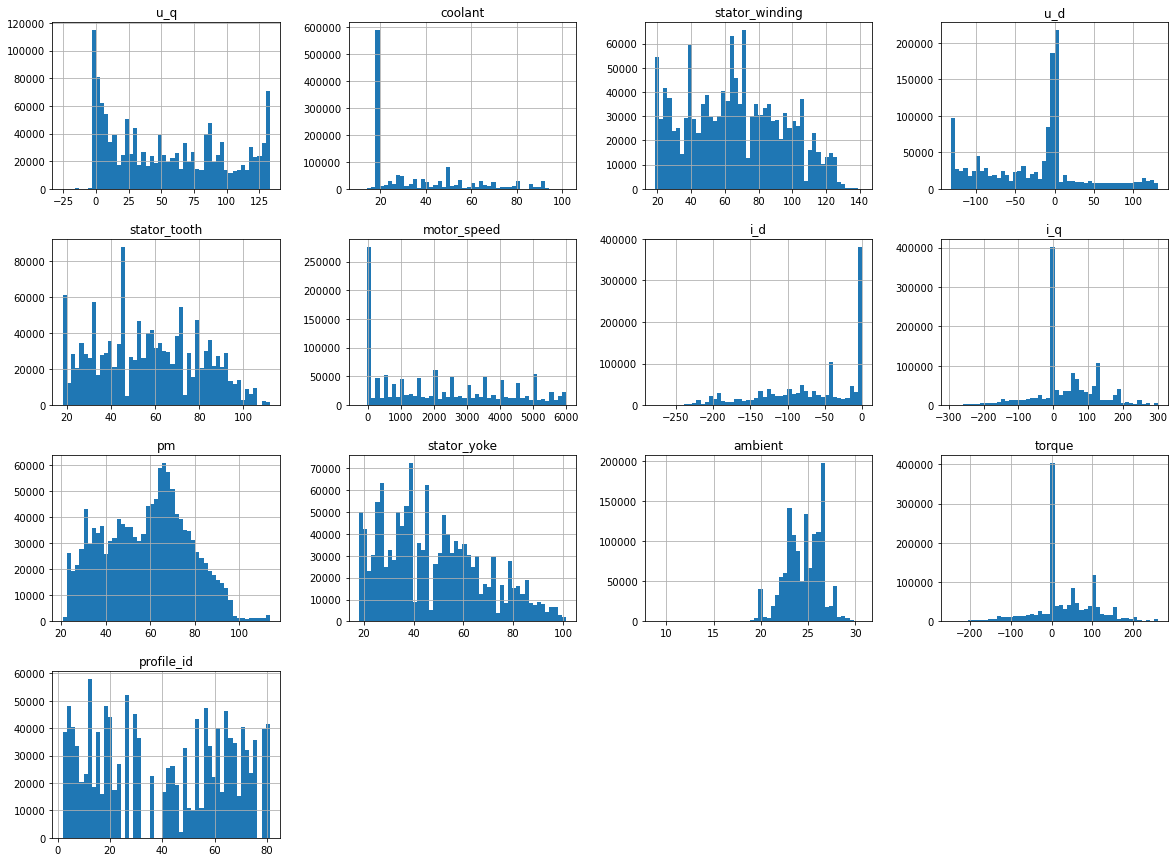

In [14]:
emc.hist(bins=50, figsize=(20,15))
plt.show()

Test

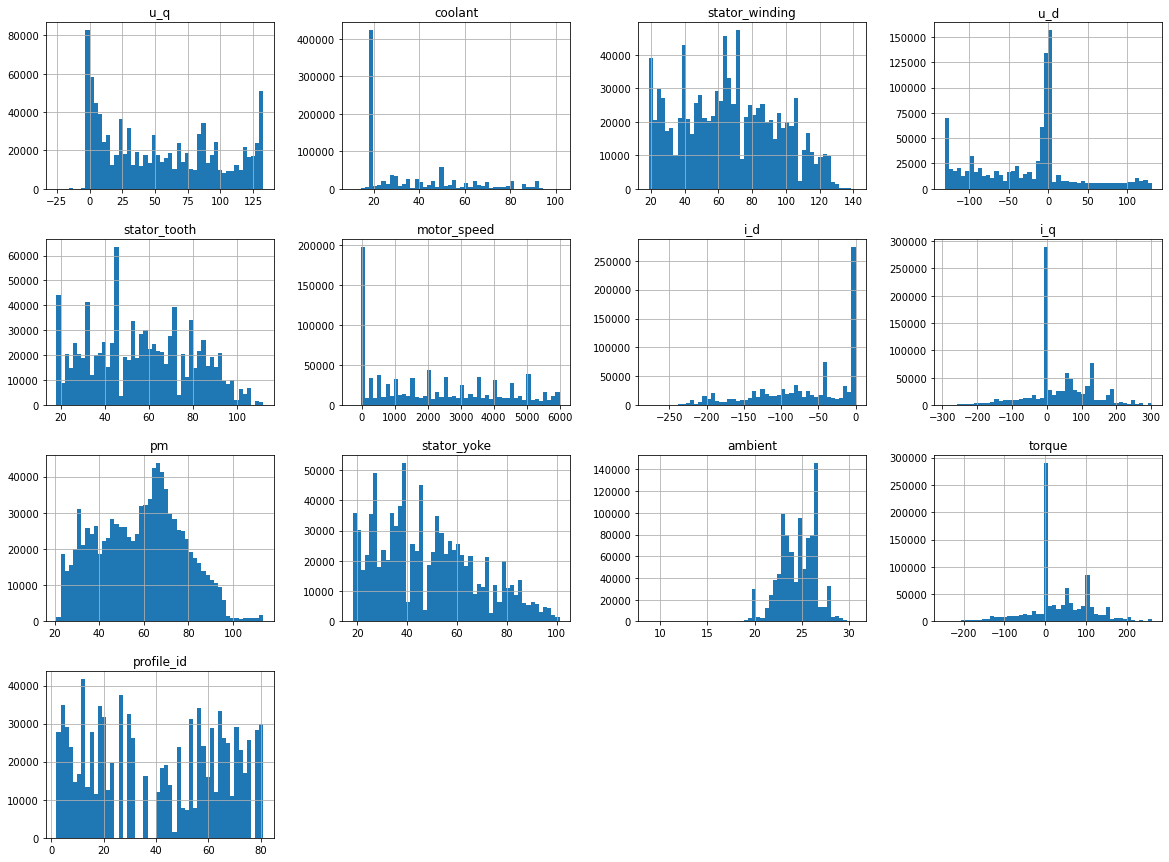

In [15]:
emct.hist(bins=50, figsize=(20,15))
plt.show()

**III**
* **Explore the Data:**
    6. Study correlations between attributes.
    7. Identify the promising transformations you may want to apply.
    8. Document the results of your exploratory data analysis.

<AxesSubplot:>

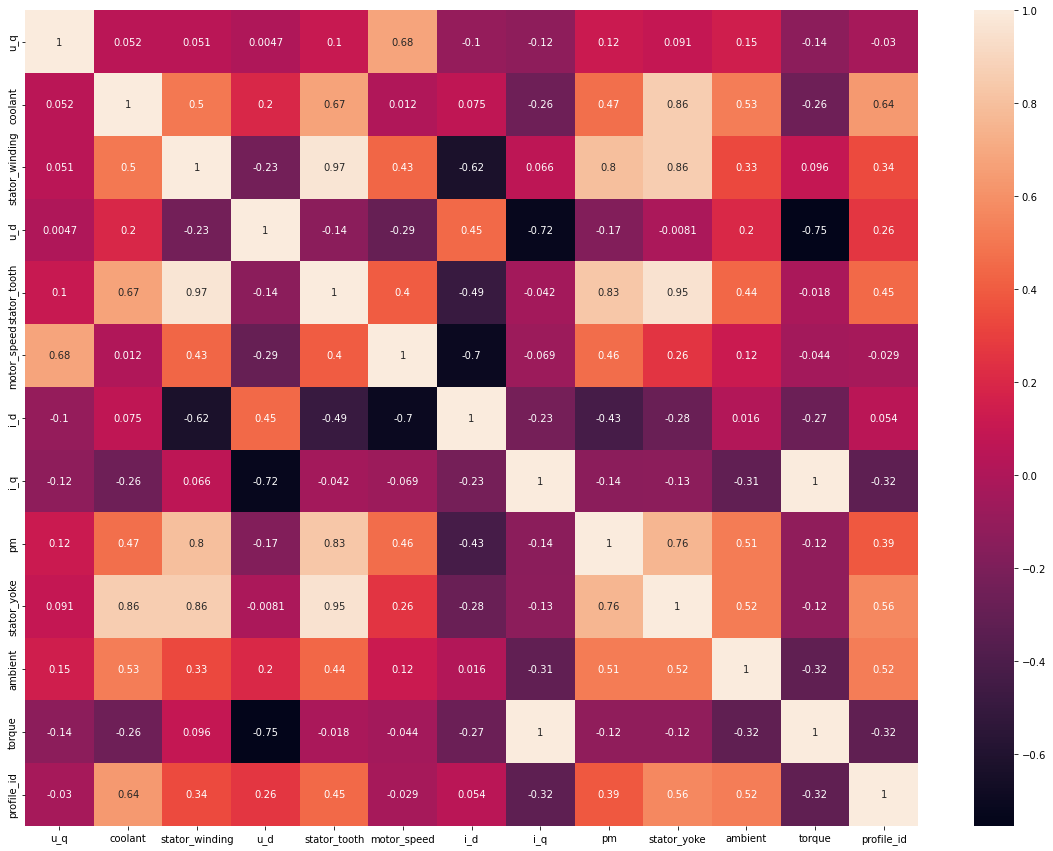

In [16]:
corr = emc.corr()
plt.figure(figsize=(20,15))
sns.heatmap(corr,annot=True)

<AxesSubplot:>

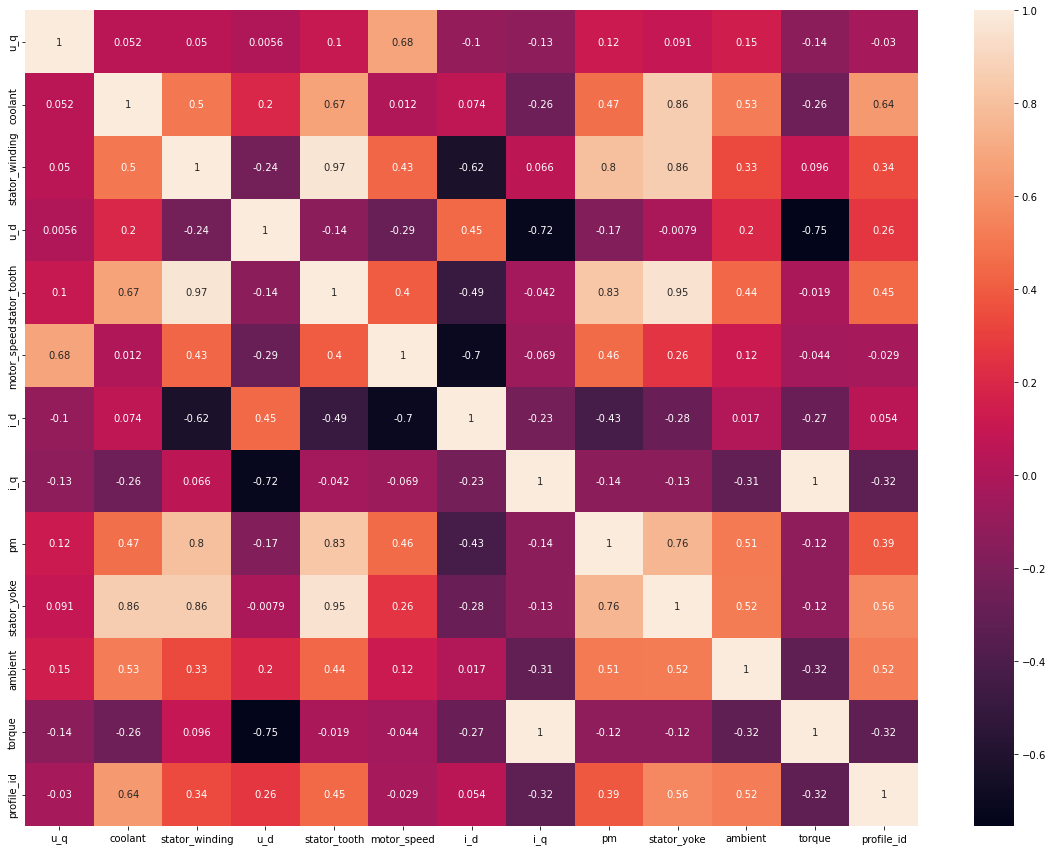

In [17]:
corr = emct.corr()
plt.figure(figsize=(20,15))
sns.heatmap(corr,annot=True)

You can see a strong correlation between i_q and torque as well as with the stator elements' temperatures. I can assume that the correlation between the temperatures of the single stator elements are highly linear. The i_q to torque correlation (of exactly 1!) does not seem to help me with further understanding my data though.

In [18]:
emc_corr=emc.corr()
emc_corr['pm']

u_q               0.122365
coolant           0.467117
stator_winding    0.795893
u_d              -0.172031
stator_tooth      0.832084
motor_speed       0.458947
i_d              -0.427736
i_q              -0.142416
pm                1.000000
stator_yoke       0.756684
ambient           0.513728
torque           -0.117138
profile_id        0.386241
Name: pm, dtype: float64

In [19]:
emct_corr=emct.corr()
emct_corr['pm']

u_q               0.122080
coolant           0.466571
stator_winding    0.795771
u_d              -0.171889
stator_tooth      0.831952
motor_speed       0.458731
i_d              -0.427543
i_q              -0.142580
pm                1.000000
stator_yoke       0.756489
ambient           0.513055
torque           -0.117295
profile_id        0.385907
Name: pm, dtype: float64

In [20]:
emc_corr['pm'].sort_values(ascending=False)

pm                1.000000
stator_tooth      0.832084
stator_winding    0.795893
stator_yoke       0.756684
ambient           0.513728
coolant           0.467117
motor_speed       0.458947
profile_id        0.386241
u_q               0.122365
torque           -0.117138
i_q              -0.142416
u_d              -0.172031
i_d              -0.427736
Name: pm, dtype: float64

In [21]:
emct_corr['pm'].sort_values(ascending=False)

pm                1.000000
stator_tooth      0.831952
stator_winding    0.795771
stator_yoke       0.756489
ambient           0.513055
coolant           0.466571
motor_speed       0.458731
profile_id        0.385907
u_q               0.122080
torque           -0.117295
i_q              -0.142580
u_d              -0.171889
i_d              -0.427543
Name: pm, dtype: float64

By creating a correlation matrix for the full data set as well as "only" the rest set, and sorting it compared to the permanent magnet temperature (pm) ascendingly, I can see that there is a strong correlation between pm and the temperatures in the stator elements, especially in the tooth. With the motor speed there is almost no more linear correlation e.g., the same goes for the ambient and coolant temperatures. 
Noticable is also the low, but singnificantilly higher (when compared to the other negative correlations) negative correlation towards the i_d value.
Of course this is only valid for linear correlation, exponential correlations etc. are not shown with that. Therefore I will try to use a more graphical visualization of my data. Also, I believe that it does not make any more sense to compare my full data set with the resting set. I should continue my work with the resting data set.

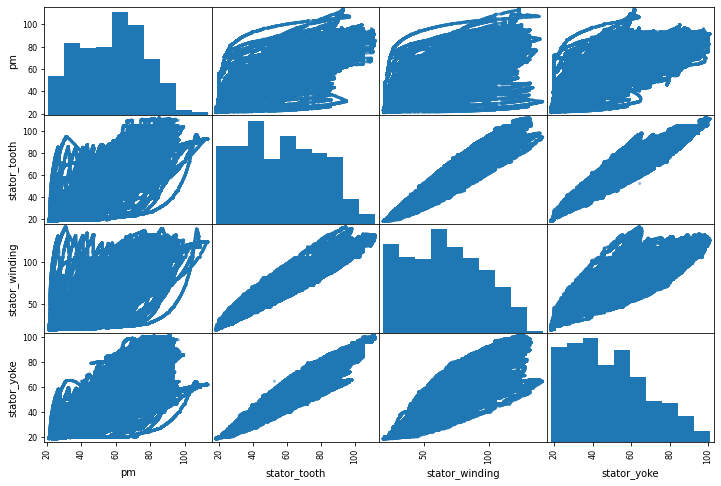

In [22]:
from pandas.plotting import scatter_matrix

attributes = ["pm", "stator_tooth", "stator_winding", "stator_yoke"]
scatter_matrix(emct[attributes], figsize=(12, 8))
plt.show()

(0.0, 120.0, 0.0, 120.0)

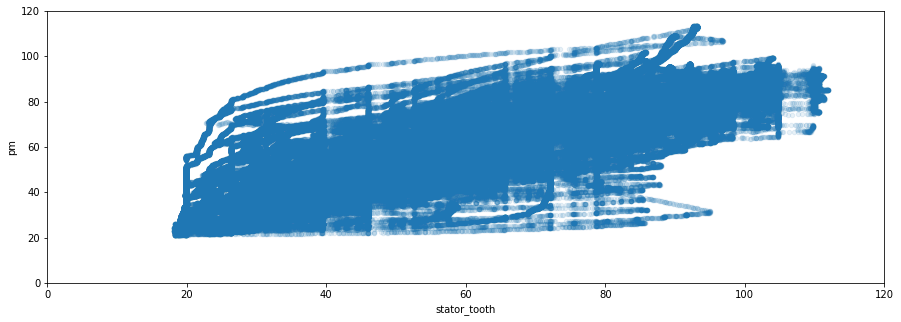

In [23]:
emct.plot(kind="scatter", x="stator_tooth", y="pm", alpha=0.1)
plt.axis([0, 120, 0, 120])

(16.220274734497075, 118.22727317810059, 7.688125340886362, 31.78589140949044)

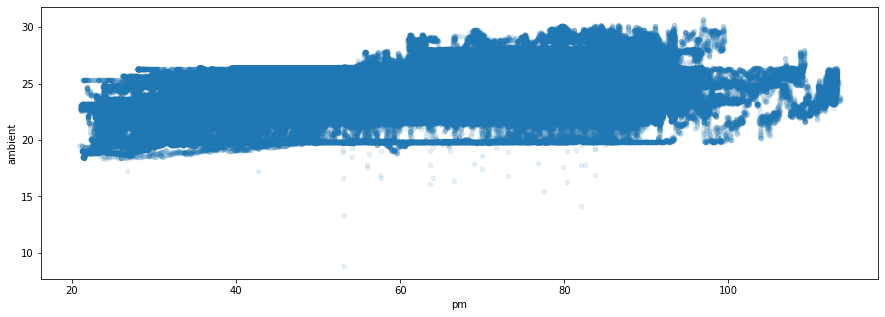

In [24]:
emct.plot(kind="scatter", x="pm", y="ambient", alpha=0.1)
plt.axis()

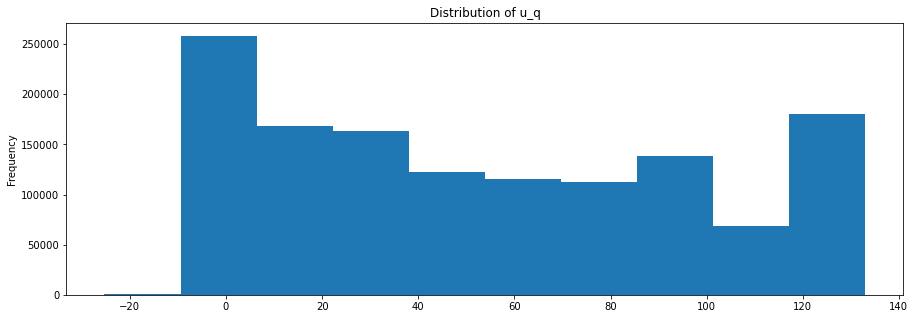

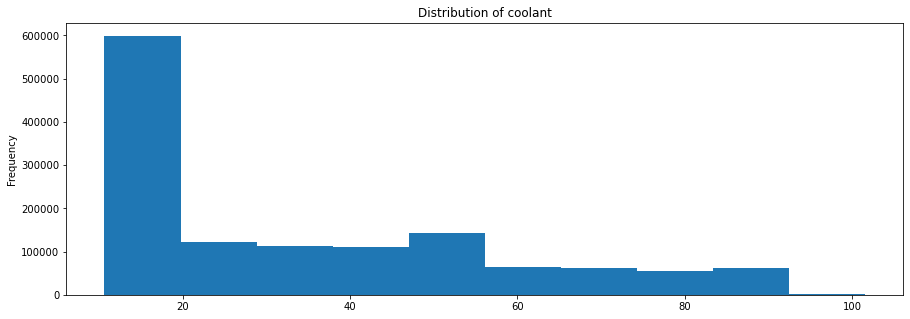

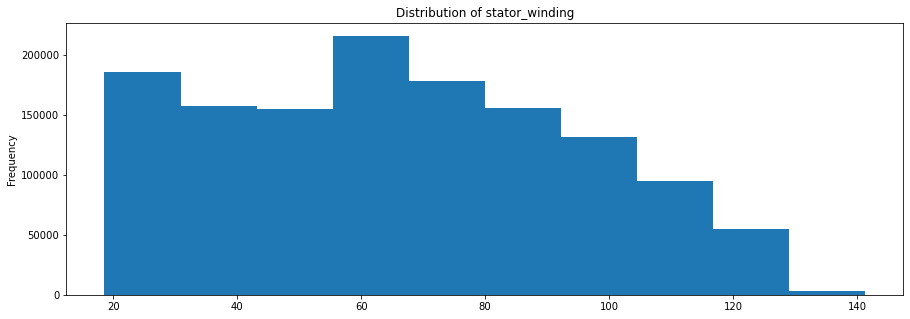

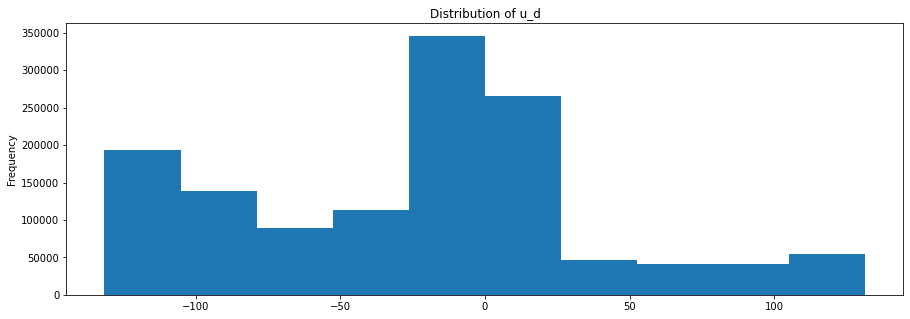

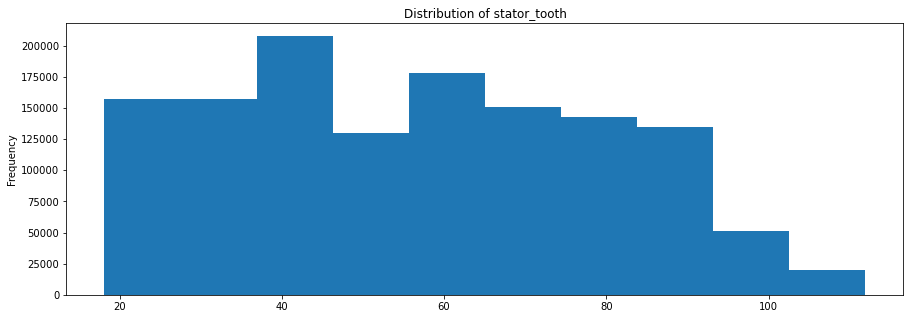

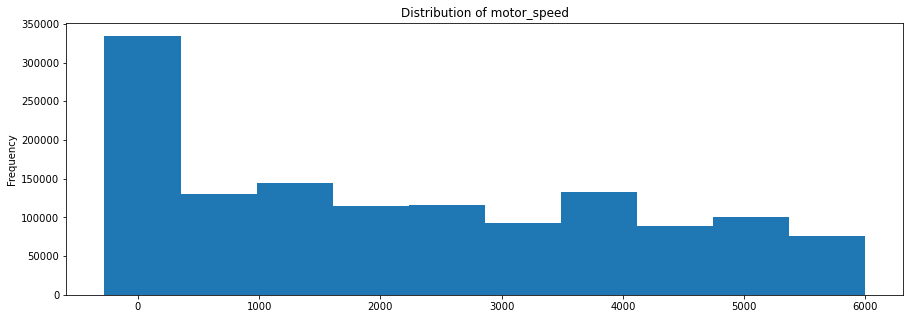

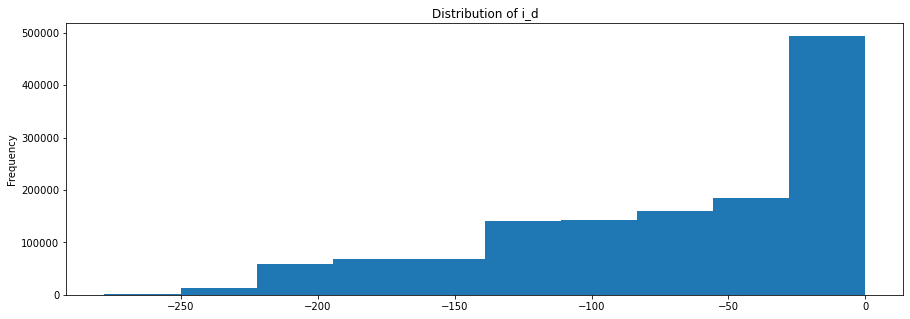

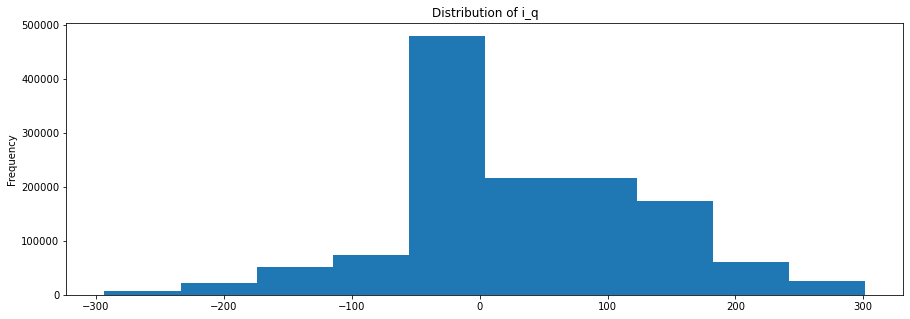

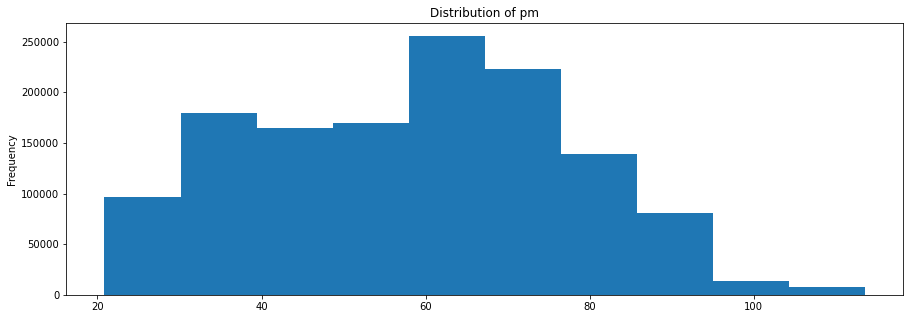

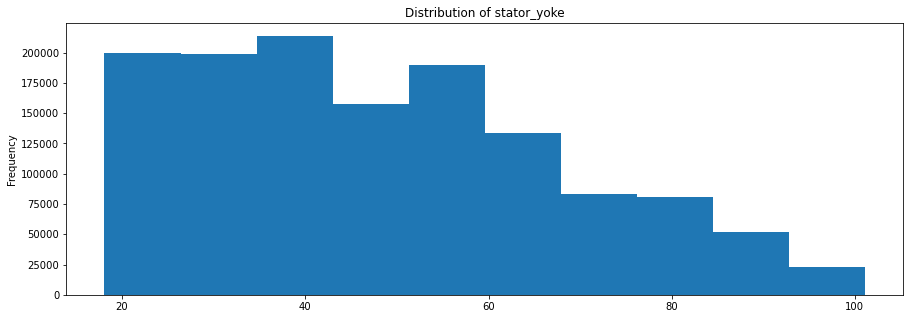

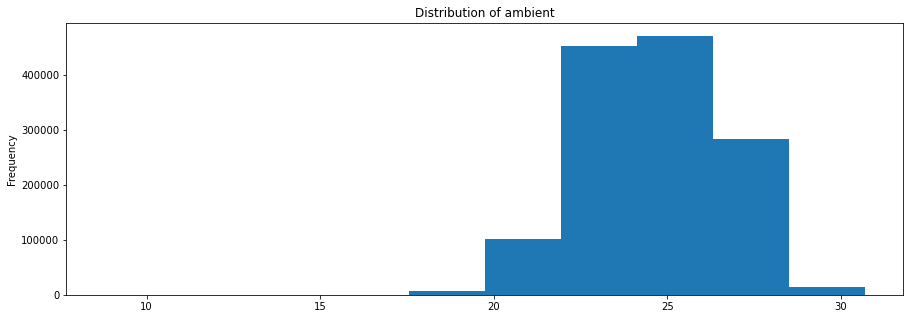

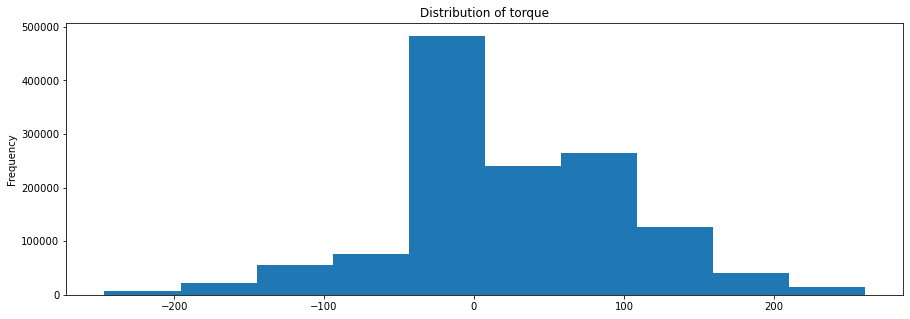

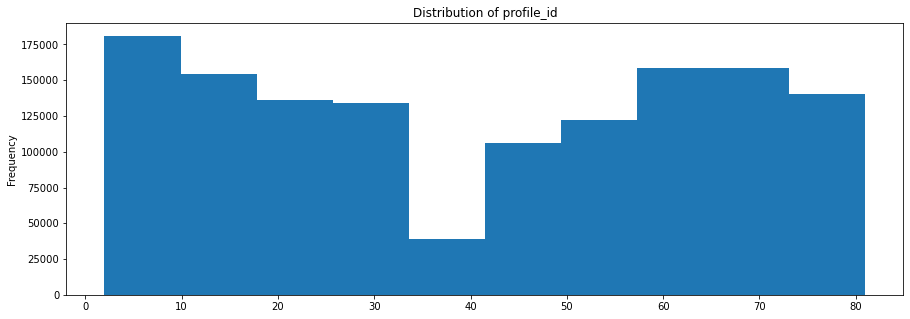

In [25]:
for i in emc.columns:
    emc[i].plot(kind='hist')
    plt.title(f'Distribution of {i}')
    plt.show()

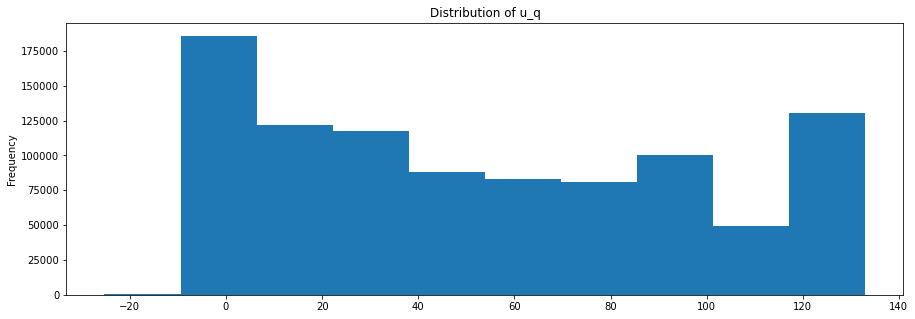

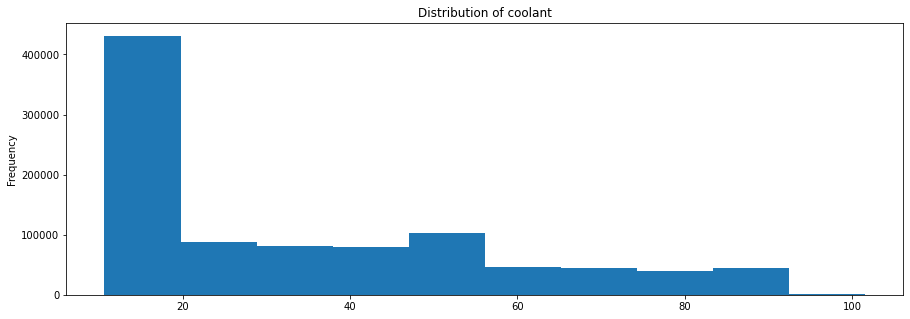

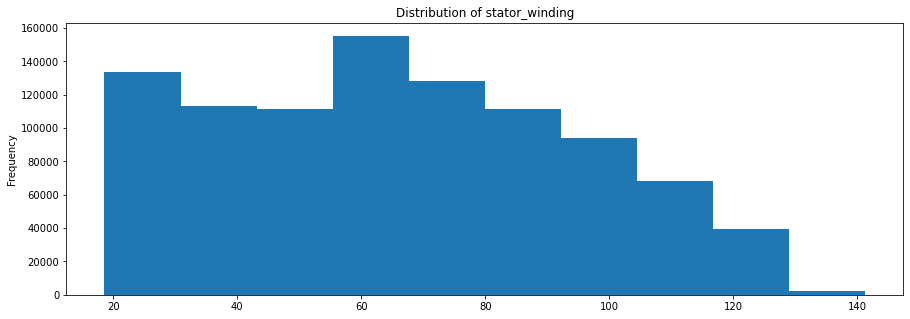

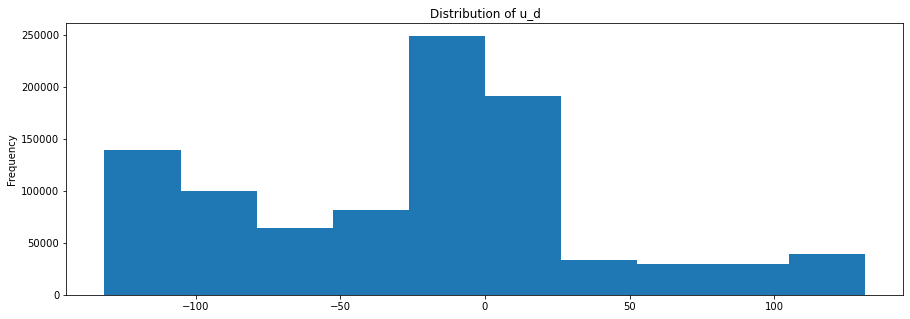

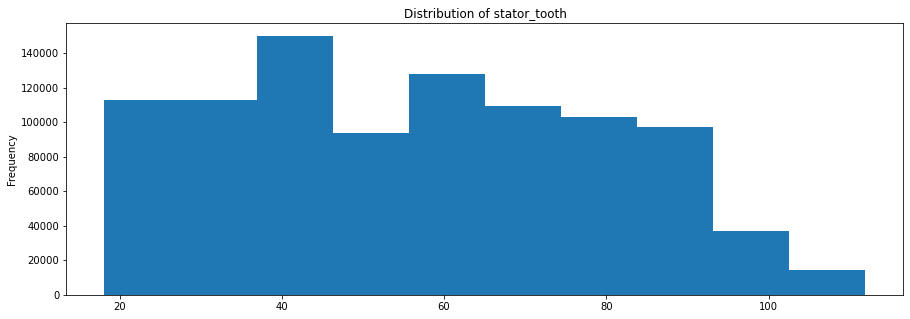

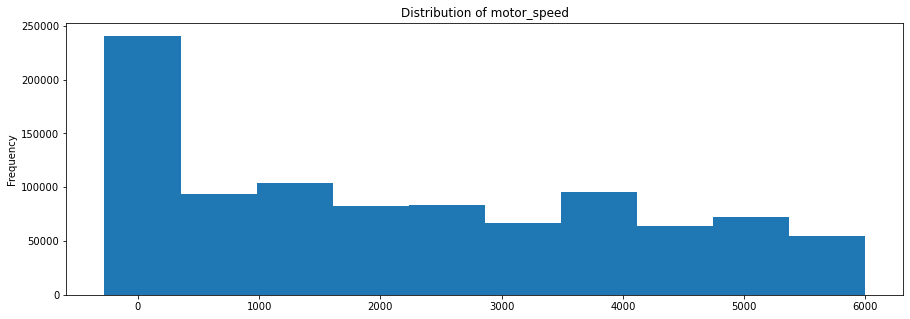

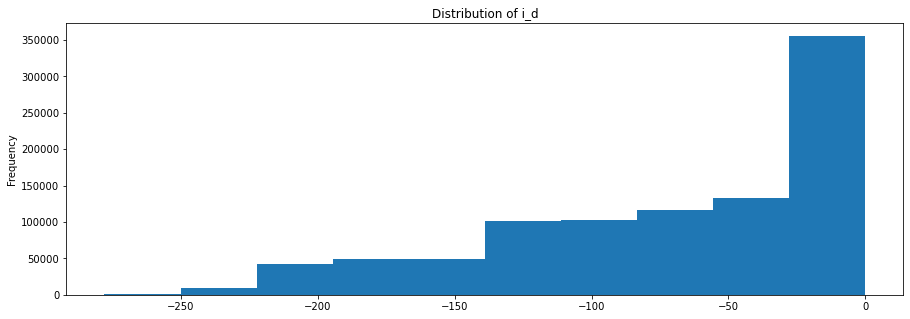

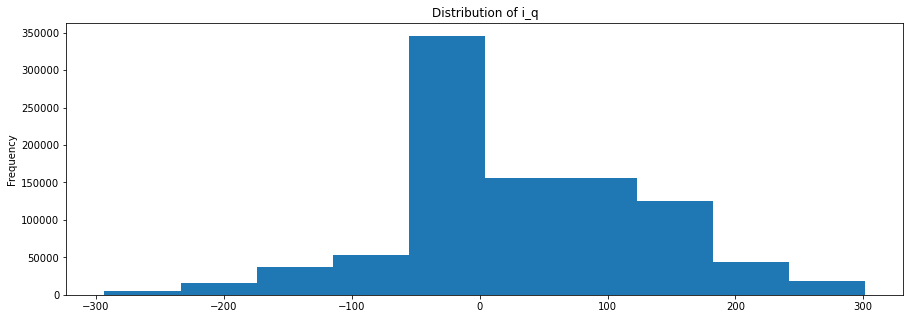

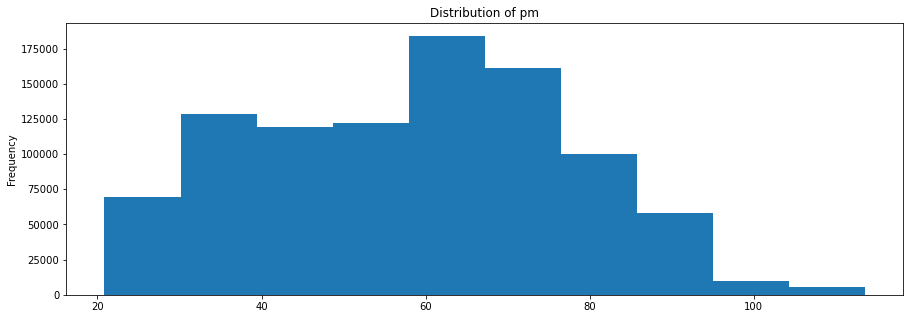

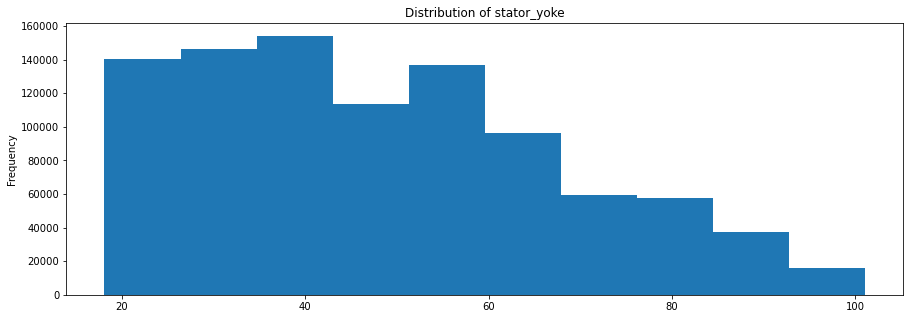

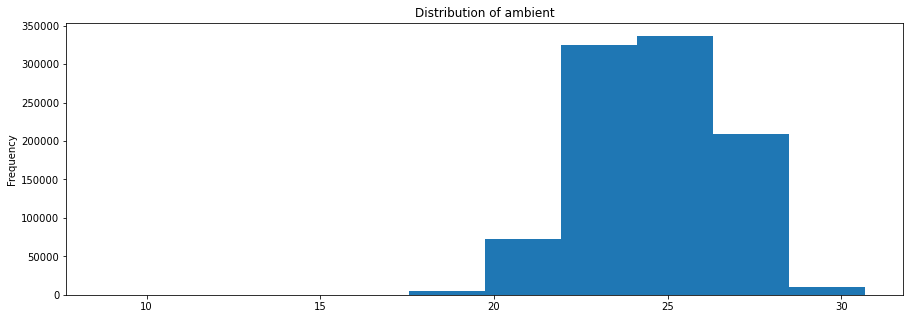

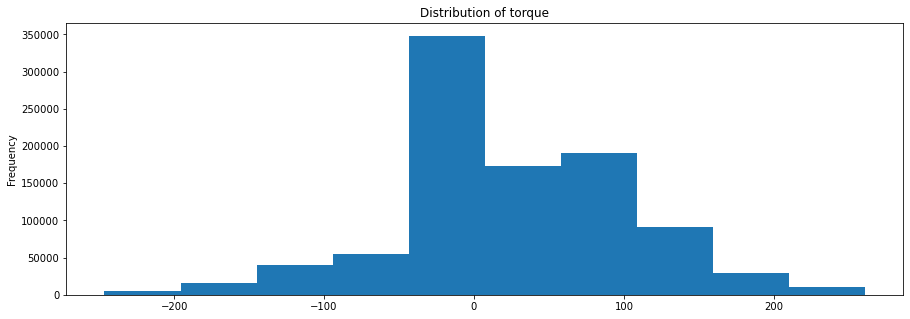

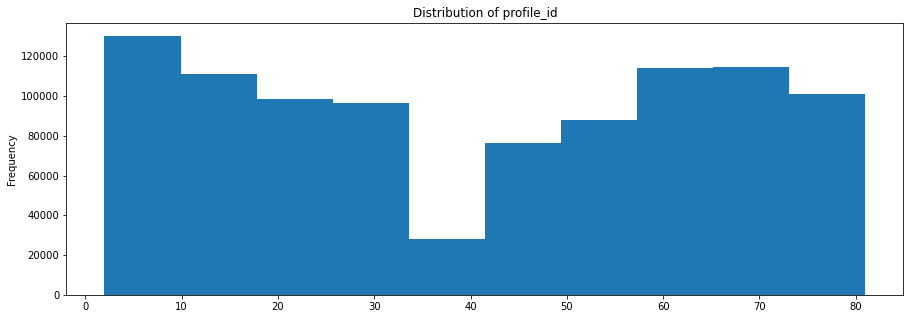

In [26]:
for i in emct.columns:
    emct[i].plot(kind='hist')
    plt.title(f'Distribution of {i}')
    plt.show()

Creating scatterplots in order to show the correlation of pm and the other values is necessary, since the methods above did not turn out to have promising results for a quick analysis of their codependency.

<AxesSubplot:xlabel='torque', ylabel='pm'>

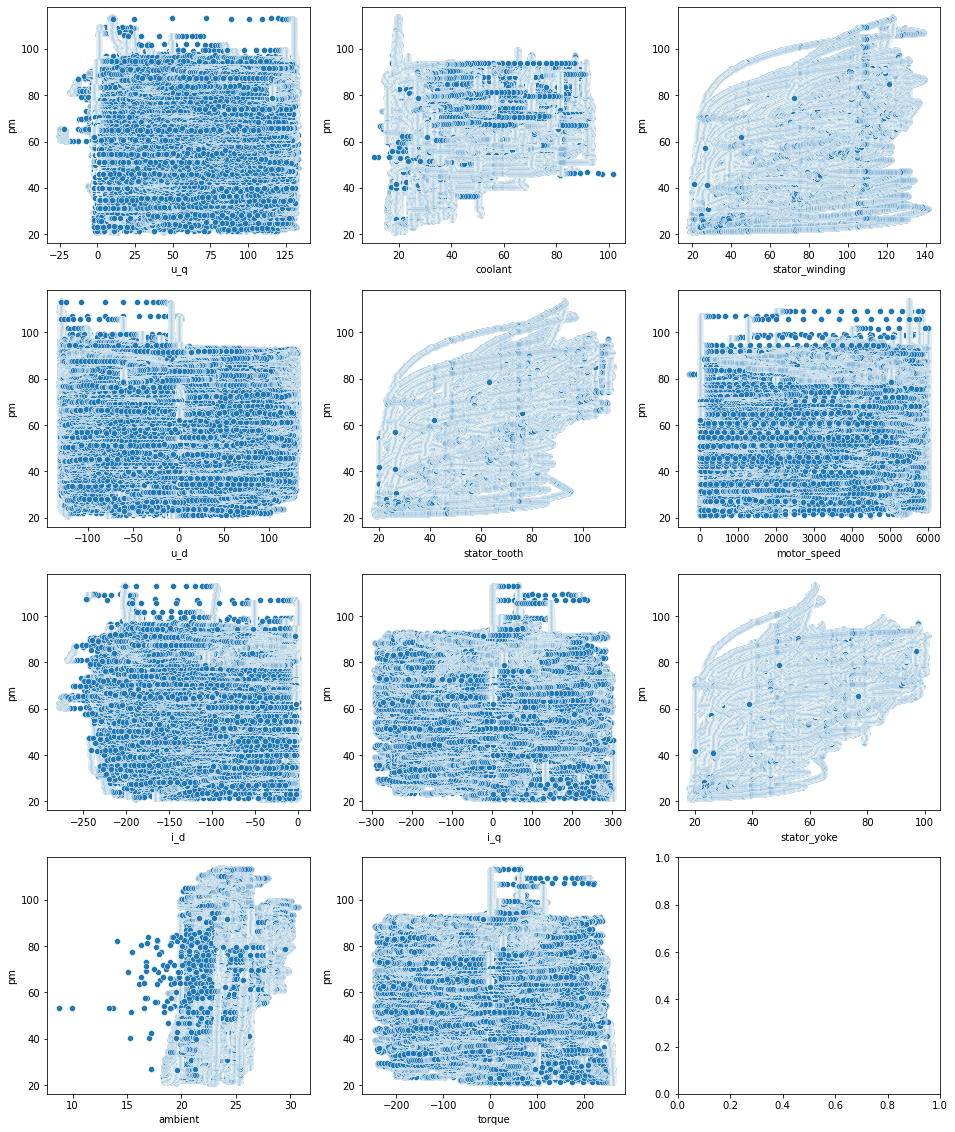

In [27]:
from pandas.plotting import scatter_matrix

figure,axes = plt.subplots(nrows=4,ncols=3,figsize=(16,20))
sns.scatterplot(data=emc,x = 'u_q', y = 'pm',ax=axes[0,0])
sns.scatterplot(data=emc,x = 'coolant', y = 'pm',ax=axes[0,1])
sns.scatterplot(data=emc,x = 'stator_winding', y = 'pm',ax=axes[0,2])
sns.scatterplot(data=emc,x = 'u_d', y = 'pm',ax=axes[1,0])
sns.scatterplot(data=emc,x = 'stator_tooth', y = 'pm',ax=axes[1,1])
sns.scatterplot(data=emc,x = 'motor_speed', y = 'pm',ax=axes[1,2])
sns.scatterplot(data=emc,x = 'i_d', y = 'pm',ax=axes[2,0])
sns.scatterplot(data=emc,x = 'i_q', y = 'pm',ax=axes[2,1])
sns.scatterplot(data=emc,x = 'stator_yoke', y = 'pm',ax=axes[2,2])
sns.scatterplot(data=emc,x = 'ambient', y = 'pm',ax=axes[3,0])
sns.scatterplot(data=emc,x = 'torque', y = 'pm',ax=axes[3,1])

My idea is to create new categories as they did in the End-to-End project with the rooms per household etc. I would like to try this with "i_d" per "motor_speed" or so. So, I would like to test this for physically logical correlations like 'more power and therefore higher speeds'. Then I can scatterplot these new categories compared to the permanent magnet temperature.

In [28]:
#housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
#housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
#housing["population_per_household"]=housing["population"]/housing["households"]

fig, ax = plt.subplots(3,1,figsize=(5,15))

ax[0].scatter(x=housing["rooms_per_household"], y=housing["median_house_value"], alpha=0.2)
ax[0].set(xlabel="rooms_per_household", ylabel="median_house_value", xlim=[0,12], ylim=[0,520000])

ax[1].scatter(x=housing["bedrooms_per_room"], y=housing["median_house_value"], alpha=0.2)
ax[1].set(xlabel="bedrooms_per_room", ylabel="median_house_value", xlim=[0,0.5], ylim=[0,520000])

ax[2].scatter(x=housing["population_per_household"], y=housing["median_house_value"], alpha=0.2)
ax[2].set(xlabel="population_per_household", ylabel="median_house_value", xlim=[0,8], ylim=[0,520000])

plt.show()

**IV**
* **Prepare the Data:**
    1. Write functions for all data transformations you apply.
    2. Clean the data.
        - remove outliers
        - fill in missing values

In [29]:
print(emc.isnull().sum())

u_q               0
coolant           0
stator_winding    0
u_d               0
stator_tooth      0
motor_speed       0
i_d               0
i_q               0
pm                0
stator_yoke       0
ambient           0
torque            0
profile_id        0
dtype: int64


In [30]:
print(emct.isnull().sum())

u_q               0
coolant           0
stator_winding    0
u_d               0
stator_tooth      0
motor_speed       0
i_d               0
i_q               0
pm                0
stator_yoke       0
ambient           0
torque            0
profile_id        0
dtype: int64


In order to find outliers, boxplots of all the categories will be created. If outliers are seen in a group of several boxplots, they will be watch closer by creating a single boxplot for that category. That is important to determine in which range these outliers are.

<AxesSubplot:>

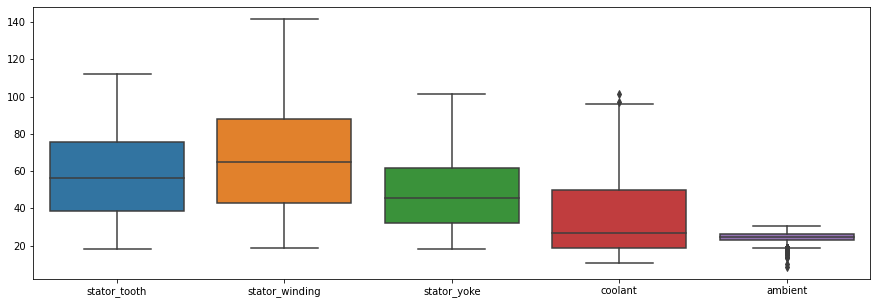

In [31]:
sns.boxplot(data=emc[['stator_tooth','stator_winding','stator_yoke','coolant', 'ambient']])

<AxesSubplot:>

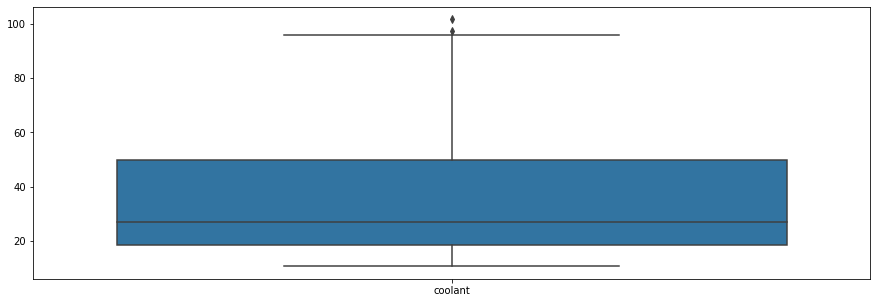

In [32]:
sns.boxplot(data=emc[['coolant']])

<AxesSubplot:>

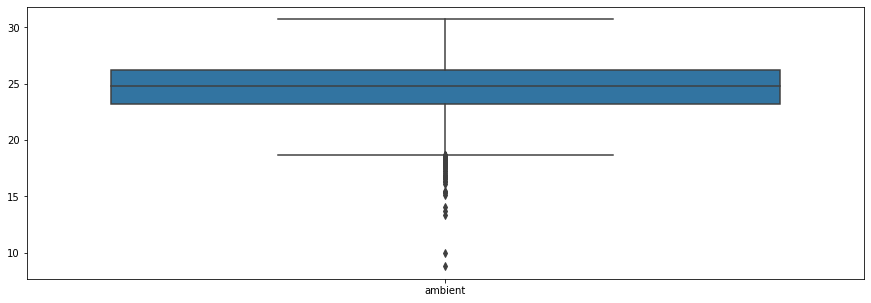

In [33]:
sns.boxplot(data=emc[['ambient']])

<AxesSubplot:>

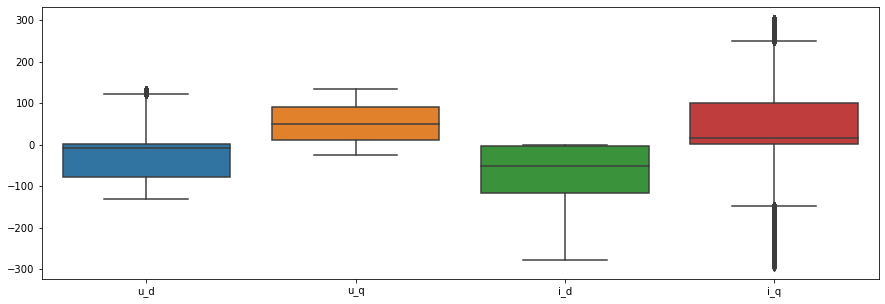

In [34]:
sns.boxplot(data=emc[['u_d','u_q','i_d','i_q']])

<AxesSubplot:>

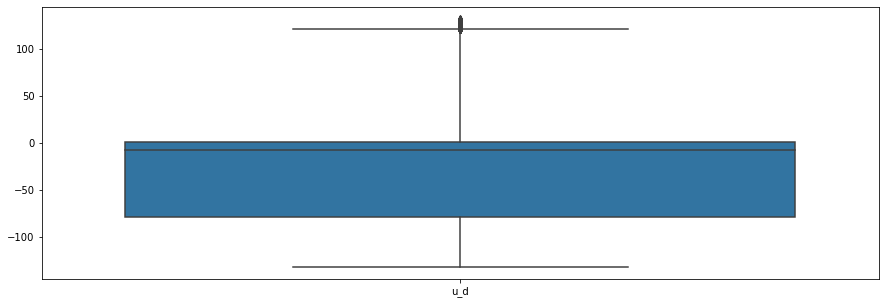

In [35]:
sns.boxplot(data=emc[['u_d']])

<AxesSubplot:>

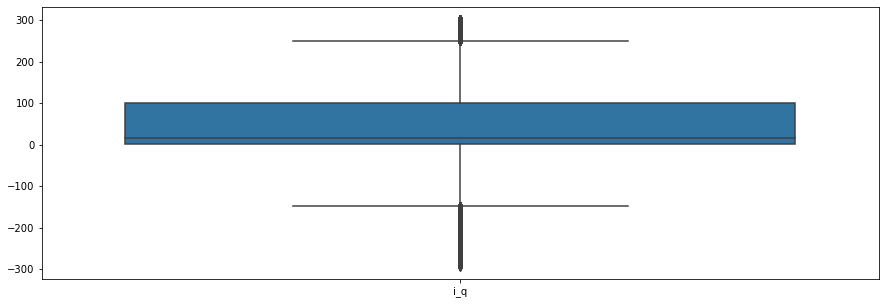

In [36]:
sns.boxplot(data=emc[['i_q']])

<AxesSubplot:>

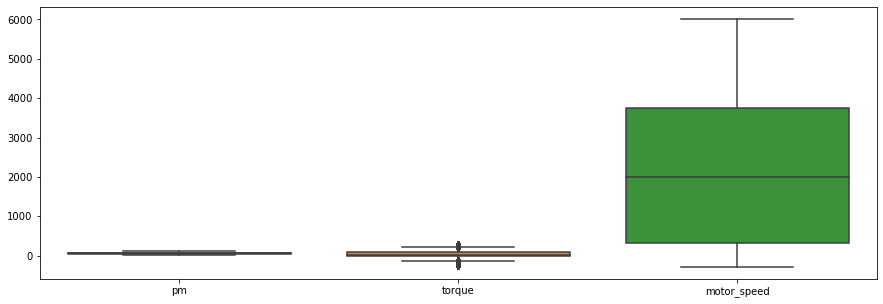

In [37]:
sns.boxplot(data=emc[['pm', 'torque', 'motor_speed']])

<AxesSubplot:>

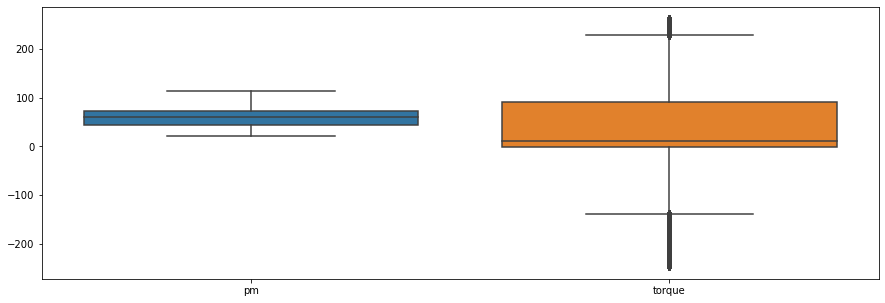

In [38]:
sns.boxplot(data=emc[['pm', 'torque']])

<AxesSubplot:>

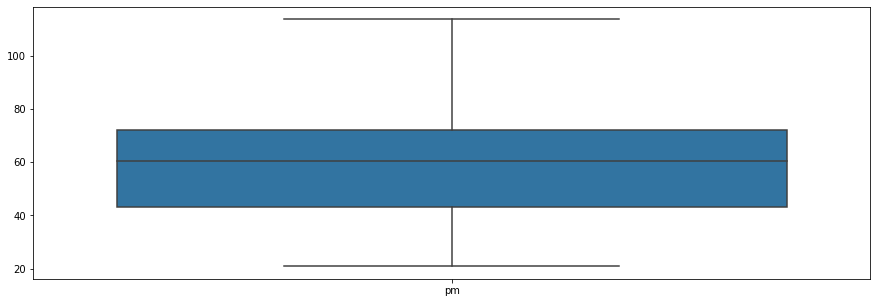

In [39]:
sns.boxplot(data=emc[['pm']])

<AxesSubplot:>

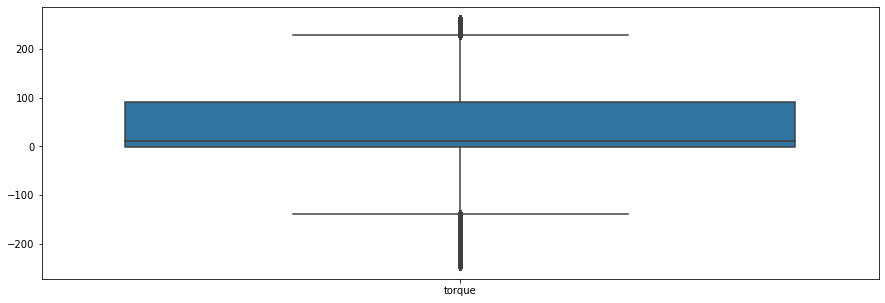

In [40]:
sns.boxplot(data=emc[['torque']])

The boxplots show us that there is outliers in the coolant (above 100) and ambient (below 20) temperature values as well as in the values for u_d and torque (both above and below).<br><br>
Data transformations are not necessary, since all the data (except for the profile_id with integer) is float-based. It is possible to work with that, therefore no transformation will be made. The search for outliers has shown that coolant and ambient as well as u_d, i_q and torque have some outliers in the data. However, these values seem to be within a realistic or matching range when compared to the other values. Therefore those outliers do not have to be removed. Since there is no values missing, none have to be filled in.

**IV**
* **Prepare the Data:**
    3. Select important features (drop attributes that provide no useful information for the task).
    4. Use feature engineering.
        - decompose categorical features
        - add promising transformations for features
        - aggregate features into promissing new features
    5. Use feature scaling (standardize or normalize features).

In [41]:
#emct2 = train_set.drop("index", axis=1) # drop labels for training set
#housing_labels = strat_train_set["median_house_value"].copy()

Dropping the profile_id_ as well as the target attribute (pm) from the training set. The profile_id gives no necessary information for the prediction of the pm temperature, as it is just an ID-number connected to a multiseries of measurements.
Many neural networks expect an input value in the range of 0 to 1, therefore the min-max-scaling offers a great advantage. However, due to the unresolved or kept outliers in the data, the standardization seems to offer a better advantage. I will for now work with both methods and compare the results later.

In [42]:
train_set_x = train_set.drop(['profile_id','pm'], axis=1)
val_set_x = val_set.drop(['profile_id','pm'], axis=1)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train_set_x_scaled = pd.DataFrame(scaler.fit_transform(train_set_x), columns=train_set_x.columns)
train_set_x_scaled.head()

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,stator_yoke,ambient,torque
0,0.313361,0.090870,0.336618,0.500619,0.348458,0.123591,0.992621,0.494872,0.239238,0.768977,0.485667
1,0.971295,0.091738,0.383095,0.466241,0.401909,0.999988,0.587342,0.493534,0.257419,0.788141,0.484792
2,0.336276,0.093005,0.702090,0.013687,0.647275,0.760969,0.311315,0.632525,0.434112,0.595042,0.642369
3,0.759282,0.323944,0.304094,0.153796,0.342429,0.521948,0.701017,0.645301,0.328717,0.655262,0.633474
4,0.991847,0.088933,0.123514,0.488302,0.162517,0.601621,0.835714,0.494995,0.119970,0.665716,0.484622


In [43]:
train_set_y = train_set.drop(['profile_id','pm'], axis=1)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_set_y_scaled = pd.DataFrame(scaler.fit_transform(train_set_x), columns=train_set_x.columns)
train_set_y_scaled.head()

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,stator_yoke,ambient,torque
0,-0.678277,-0.795865,-0.224713,0.400086,-0.263744,-0.915442,1.027891,-0.393959,-0.512466,0.551837,-0.403370
1,1.679485,-0.792239,-0.025751,0.256803,-0.045229,2.041619,-0.707679,-0.402601,-0.436924,0.769423,-0.409126
2,-0.596159,-0.786943,1.339823,-1.629387,0.957859,1.235142,-1.889736,0.494664,0.297274,-1.422962,0.627505
3,0.919721,0.177742,-0.363946,-1.045428,-0.288390,0.428660,-0.220874,0.577137,-0.140665,-0.739249,0.568991
4,1.753134,-0.803957,-1.136980,0.348751,-1.023896,0.697486,0.355950,-0.393167,-1.008051,-0.620553,-0.410244


**V**
* **Select and Train your Models:**
    1. Learn the basics about the models you've been assigned.
    2. Select a 3rd model on your own. Use criteria for your selection.
    3. Make a plan for training and evaluation of the models.
    4. Build your models (select meaningful values for the model parameters).
    5. Train your models with the training set.
    6. Measure and compare the performance of your models (use N-fold cross-validation).
    7. Analyze the most significant parameters for each model.
    8. Analyze the types of errors the models make.

In [55]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso, LinearRegression, SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [56]:
#def predict(method):
#    method.fit(train_set_x_scaled)
#    x_pred = method.predict(val_set_x)
#    print('R2 score',r2_score(test_set, x_pred))

In [57]:
#predict(DecisionTreeRegressor)

In [58]:
model1 = DecisionTreeRegressor(random_state=42)
model1.fit(train_set_x, train_set_y)
model1y = model_one.predict(val_set_x)
model1mse = mean_squared_error(val_set_y, model_one_y)
print("MSE Model 1: "+str(model_one_mse))
model_one_rmse = np.sqrt(model_one_mse)
print("RMSE Model 1: "+str(model_one_rmse))
model_one_mae = mean_absolute_error(val_set_y, model_one_y)
print("MAE Model 1: "+str(model_one_mae))
model_one_r2 = r2_score(val_set_y, model_one_y)
print("R2 Model 1: "+str(model_one_r2))

NameError: name 'model_one' is not defined